***DETECÇÃO DE HETEROCEDASTICIDADE***


**Exercício:**

Você é um analista de dados em uma agência de pesquisa social e deseja realizar uma análise de regressão para entender a relação entre a densidade populacional e a distância dos recenseamentos ao centro de negócios central em Baltimore. O objetivo é determinar se a distância tem algum impacto na densidade populacional.

**Dados:**

Você possui duas listas de dados: "Densidade" (densidade populacional) e "Distância" (distância do recenseamento ao centro de negócios central). As listas estão mais abaixo

**Exercício:**

1. Carregue os dados em um pandas dataframe.

2. ajuste um modelo de regressão linear simples com a distância como variável independente (features ou x) e o densidade como variável dependente (target ou y).

3. Calcule os resíduos do modelo de regressão.

4. Realize um teste de White ou Breusch-Pagan (você pode escolher) para detectar a heterocedasticidade nos resíduos. Use um nível de significância de 0,05.

5. Com base no resultado do teste, interprete se há evidências de heterocedasticidade nos resíduos.

6. Crie gráficos de dispersão dos resíduos em relação à distância para visualizar possíveis padrões de heterocedasticidade.

In [ ]:
densidade =  [
        18640.0, 38275.0, 2450.3, 21969.0, 9573.7, 13751.0, 38947.0, 17921.0, 5050.7, 4519.0,
        6781.1, 8246.2, 5166.4, 7762.4, 11081.0, 7188.0, 13753.0, 7492.4, 3620.9, 6390.6,
        5485.8, 3416.5, 8194.7, 5091.9, 1183.8, 4157.9, 2158.3, 12428.0, 6788.5, 3277.4,
        3258.2, 5491.3, 865.02, 340.69, 507.03, 323.67, 108.36, 805.66, 156.84
    ]
distancia = [
        1.002, 1.403, 2.004, 2.138, 2.205, 3.608, 3.675, 4.009, 4.276, 4.410,
        4.543, 4.810, 4.944, 5.211, 5.345, 5.679, 5.813, 5.813, 5.879, 6.080,
        6.748, 6.882, 6.948, 6.948, 7.082, 7.416, 7.483, 7.617, 7.750, 7.750,
        7.951, 8.084, 11.250, 13.250, 15.500, 18.000, 19.000, 23.000, 26.250
    ]


In [ ]:
#construir Data Frame
import pandas as pd
import numpy as np

data = pd.DataFrame({'densidade': densidade,
                     'distancia': distancia})

# Converter para um DataFrame do pandas
df = np.log(data)

# Exibir o DataFrame
# print(df)

                            OLS Regression Results                            
Dep. Variable:              densidade   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     64.96
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           1.16e-09
Time:                        21:08:31   Log-Likelihood:                -48.217
No. Observations:                  39   AIC:                             100.4
Df Residuals:                      37   BIC:                             103.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2004      0.382     29.291      0.0

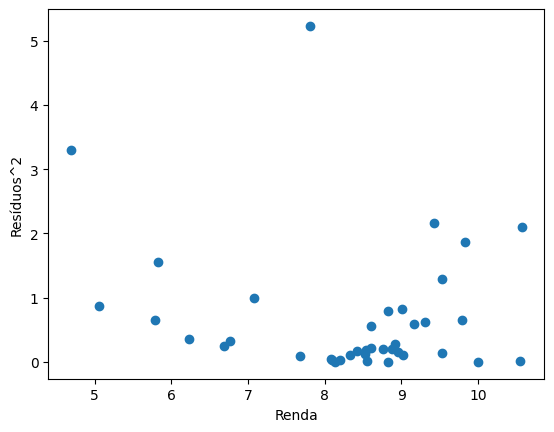

In [ ]:
# Importar a biblioteca statsmodels.api como sm para realizar análises estatísticas
import statsmodels.api as sm

#Importar biblioteca matplotlib para plotagem de dados
import matplotlib.pyplot as plt

# Definir a variável alvo (target) como 'gastos' do DataFrame df
target = df.densidade

# Definir as características (features) como todas as colunas do DataFrame df, exceto 'gastos'
features = df.drop("densidade", axis=1)

# Adicionar uma constante (intercept) às características. Isso é necessário para a regressão linear.
features = sm.add_constant(features)

# Ajustar um modelo de regressão linear ordinária (OLS) com a variável alvo e as características
fit = sm.OLS(target, features).fit()

# Imprimir um resumo estatístico do modelo ajustado
print(fit.summary())

plt.scatter(df.densidade, fit.resid ** 2)
plt.ylabel('Resíduos^2')
plt.xlabel('Renda')
plt.show()
plt.show()

In [ ]:
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

# Realize o teste de Breusch-Pagan
bp_test = het_breuschpagan(fit.resid, features)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(lzip(labels, bp_test))


# Realize o teste de White
white_test = het_white(fit.resid, features)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(lzip(labels, white_test))

[('LM Statistic', 0.2980953100603255), ('LM-Test p-value', 0.5850789614180926), ('F-Statistic', 0.2849866579072798), ('F-Test p-value', 0.5966441788468815)]
[('LM Statistic', 4.15913841776517), ('LM-Test p-value', 0.1249840426182952), ('F-Statistic', 2.148755458962187), ('F-Test p-value', 0.13135210123133895)]


teste de Breusch-Pagan -> p valor do F teste é 0.59, superior à 0.05. Aceita a hipótese nula de heterocedasticidade

teste de Whoite -> p valor do F teste é 0.13, superior à 0.05. Aceita a hipótese nula de heterocedasticidade

Logo ao transformarmos a variável usando log obtemos uma regressão sem problemas de heterocedasticidade.

Logo o modelo final em log é:
- log(densidade) = 11.20 - 1.5963 * log(distancia)